In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.special import roots_legendre
from scipy.integrate import simpson, trapezoid, fixed_quad, quad, tplquad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






Valor de referencia para la integral 1: 1.59209771



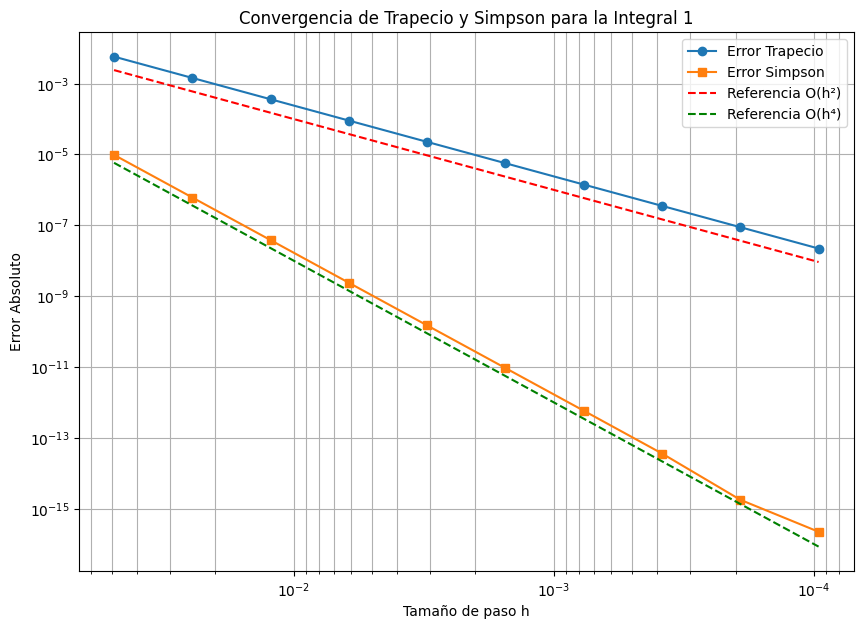

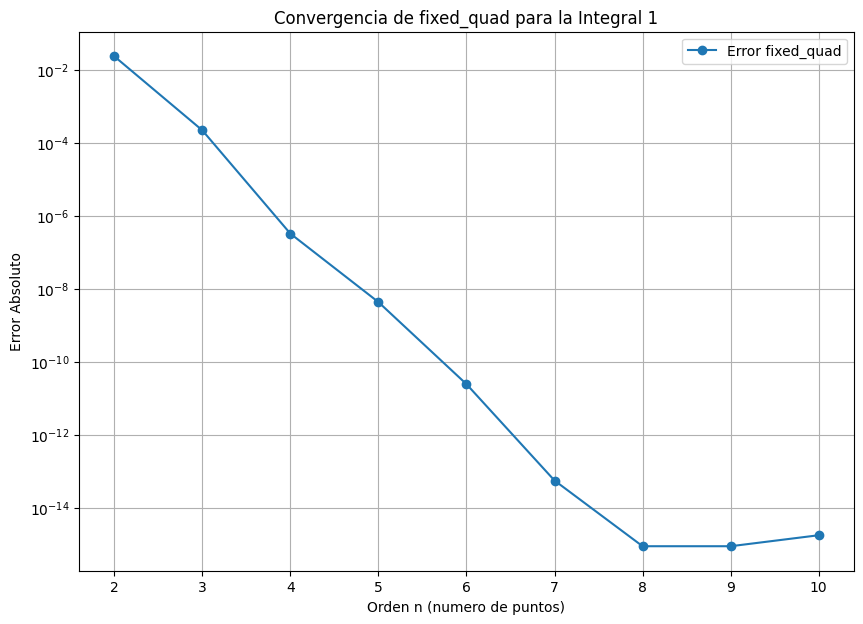

In [2]:
# Se definen la funcion y los limites de integracion.
funcion_1 = lambda x: np.exp(3*x) * np.sin(x)
a1, b1 = 0, np.pi/4

# Se calcula el valor de referencia con 'quad' para medir el error.
valor_exacto_1, _ = quad(funcion_1, a1, b1)
print(f"Valor de referencia para la integral 1: {valor_exacto_1:.8f}\n")


# --- Estudio de Convergencia: Trapecio y Simpson ---
# Se define un rango para el numero de subintervalos 'n'.
n_valores = 2**np.arange(4, 14)
h_valores = (b1 - a1) / n_valores

# Se guardaran los errores para cada metodo.
errores_trapecio_1 = []
errores_simpson_1 = []

for n in n_valores:
    # Se crean los puntos de evaluacion para este 'n'.
    puntos_x = np.linspace(a1, b1, n + 1)
    puntos_y = funcion_1(puntos_x)

    # Se calcula la integral y el error para el metodo del trapecio.
    integral_t = trapezoid(puntos_y, puntos_x)
    errores_trapecio_1.append(np.abs(integral_t - valor_exacto_1))

    # Se calcula la integral y el error para el metodo de Simpson.
    integral_s = simpson(puntos_y, puntos_x)
    errores_simpson_1.append(np.abs(integral_s - valor_exacto_1))

# --- Grafica de Convergencia (Trapecio y Simpson) ---
plt.figure(figsize=(10, 7))
plt.loglog(h_valores, errores_trapecio_1, 'o-', label='Error Trapecio')
plt.loglog(h_valores, errores_simpson_1, 's-', label='Error Simpson')
plt.loglog(h_valores, h_valores**2, 'r--', label='Referencia O(h²)')
plt.loglog(h_valores, h_valores**4, 'g--', label='Referencia O(h⁴)')
plt.title("Convergencia de Trapecio y Simpson para la Integral 1")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto")
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True, which="both")
plt.show()


# --- Estudio de Convergencia: fixed_quad (Cuadratura Gaussiana) ---
ordenes_n = np.arange(2, 11)
errores_fixed_quad_1 = []

for n in ordenes_n:
    # Se calcula la integral para un orden 'n' fijo de puntos.
    integral_fq, _ = fixed_quad(funcion_1, a1, b1, n=n)
    errores_fixed_quad_1.append(np.abs(integral_fq - valor_exacto_1))

# --- Grafica de Convergencia (fixed_quad) ---
plt.figure(figsize=(10, 7))
plt.semilogy(ordenes_n, errores_fixed_quad_1, 'o-', label='Error fixed_quad')
plt.title("Convergencia de fixed_quad para la Integral 1")
plt.xlabel("Orden n (numero de puntos)")
plt.ylabel("Error Absoluto")
plt.xticks(ordenes_n)
plt.legend()
plt.grid(True, which="both")
plt.show()

Valor de referencia para la integral 2: 0.27251388



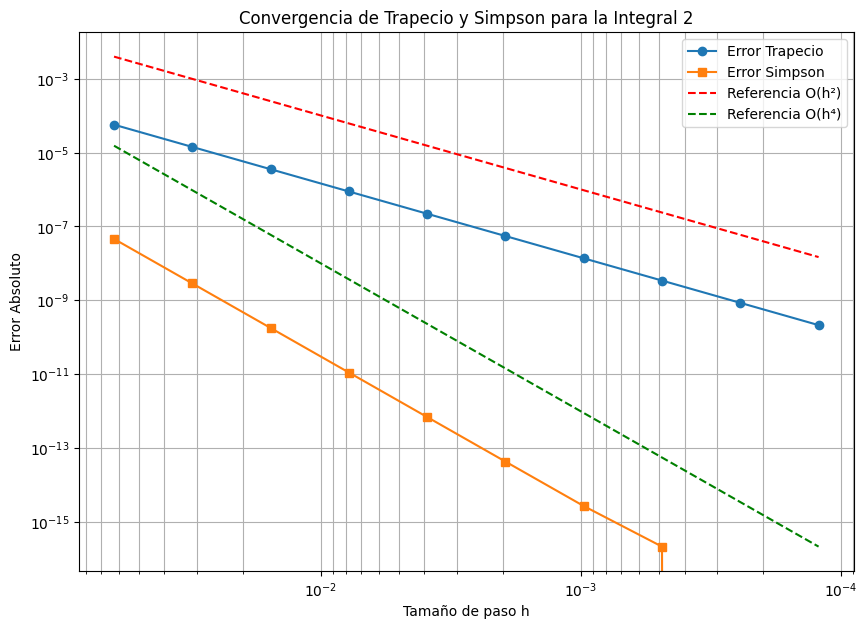

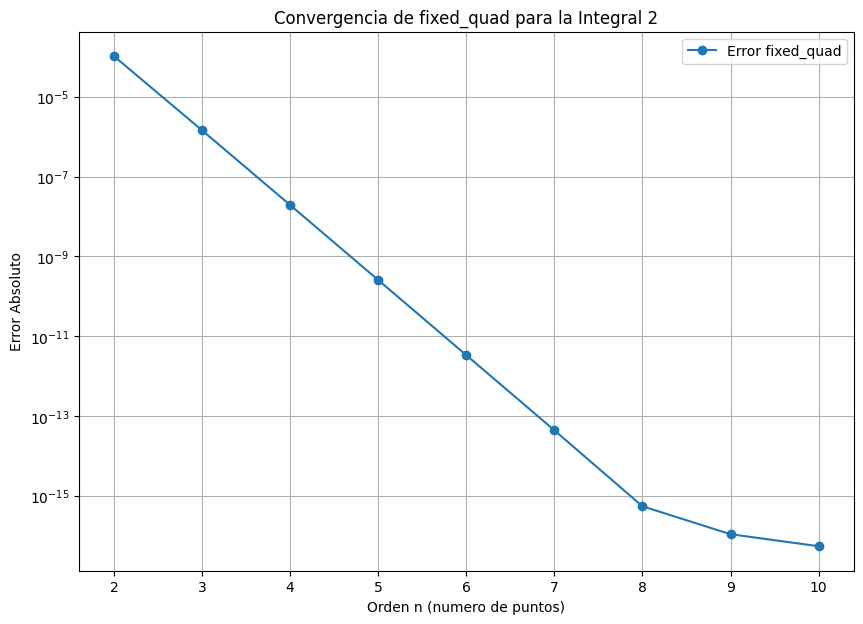

In [3]:
# Se definen la funcion y los limites de la segunda integral.
funcion_2 = lambda x: 1 / (x * np.log(x))
a2, b2 = np.e, 1 + np.e

# Se calcula el valor de referencia con 'quad'.
valor_exacto_2, _ = quad(funcion_2, a2, b2)
print(f"Valor de referencia para la integral 2: {valor_exacto_2:.8f}\n")


# --- Estudio de Convergencia: Trapecio y Simpson ---
n_valores = 2**np.arange(4, 14)
h_valores = (b2 - a2) / n_valores

errores_trapecio_2 = []
errores_simpson_2 = []

for n in n_valores:
    puntos_x = np.linspace(a2, b2, n + 1)
    puntos_y = funcion_2(puntos_x)

    integral_t = trapezoid(puntos_y, puntos_x)
    errores_trapecio_2.append(np.abs(integral_t - valor_exacto_2))

    integral_s = simpson(puntos_y, puntos_x)
    errores_simpson_2.append(np.abs(integral_s - valor_exacto_2))

# --- Grafica de Convergencia (Trapecio y Simpson) ---
plt.figure(figsize=(10, 7))
plt.loglog(h_valores, errores_trapecio_2, 'o-', label='Error Trapecio')
plt.loglog(h_valores, errores_simpson_2, 's-', label='Error Simpson')
plt.loglog(h_valores, h_valores**2, 'r--', label='Referencia O(h²)')
plt.loglog(h_valores, h_valores**4, 'g--', label='Referencia O(h⁴)')
plt.title("Convergencia de Trapecio y Simpson para la Integral 2")
plt.xlabel("Tamaño de paso h")
plt.ylabel("Error Absoluto")
plt.gca().invert_xaxis()
plt.legend()
plt.grid(True, which="both")
plt.show()


# --- Estudio de Convergencia: fixed_quad (Cuadratura Gaussiana) ---
ordenes_n = np.arange(2, 11)
errores_fixed_quad_2 = []

for n in ordenes_n:
    integral_fq, _ = fixed_quad(funcion_2, a2, b2, n=n)
    errores_fixed_quad_2.append(np.abs(integral_fq - valor_exacto_2))

# --- Grafica de Convergencia (fixed_quad) ---
plt.figure(figsize=(10, 7))
plt.semilogy(ordenes_n, errores_fixed_quad_2, 'o-', label='Error fixed_quad')
plt.title("Convergencia de fixed_quad para la Integral 2")
plt.xlabel("Orden n (numero de puntos)")
plt.ylabel("Error Absoluto")
plt.xticks(ordenes_n)
plt.legend()
plt.grid(True, which="both")
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [4]:
# --- Metodo 1: Usando `quad` de forma iterativa ---

# 1. Se define la integral mas interna (respecto a z).
integral_z = lambda y, x: quad(lambda z: (1/y) * np.sin(z/y), 0, x * y)[0]

# 2. Se define la integral media (respecto a y), que integra el resultado anterior.
integral_y = lambda x: quad(lambda y: integral_z(y, x), 0, x)[0]

# 3. Se resuelve la integral externa (respecto a x) para el resultado final.
resultado_quad, error_quad = quad(integral_y, 0, np.pi)


# --- Metodo 2: Usando `tplquad`
resultado_tplquad, error_tplquad = tplquad(
    lambda z, y, x: (1/y) * np.sin(z/y), # El integrando
    0, np.pi,                            # Limites de x (externa)
    lambda x: 0, lambda x: x,            # Limites de y (media)
    lambda x, y: 0, lambda x, y: x*y     # Limites de z (interna)
)


# --- Resultados y Comparacion ---
print("--- Resultados de la Integral Triple ---")
print(f"Resultado usando quad iterativo: {resultado_quad:.8f}")
print(f"Resultado usando tplquad:         {resultado_tplquad:.8f}")

# El valor analitico de la integral es 2.
print("\nAmbos metodos numericos coinciden y se aproximan al mismo valor")

--- Resultados de la Integral Triple ---
Resultado usando quad iterativo: 6.93480220
Resultado usando tplquad:         6.93480220

Ambos metodos numericos coinciden y se aproximan al mismo valor


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [5]:
def cuadratura_gaussiana(func, a, b, n):
    """
    Calcula la integral de una funcion en un intervalo [a, b]
    usando cuadratura Gaussiana de n puntos.
    """
    # 1. Se obtienen las raices (puntos) y pesos para el intervalo estandar [-1, 1].
    puntos_t, pesos_w = roots_legendre(n)

    # 2. Se aplica el cambio de variable para mapear los puntos de [-1, 1] a [a, b].
    puntos_x = ((b - a) / 2) * puntos_t + ((b + a) / 2)

    # 3. Se aplica la formula de cuadratura, incluyendo el factor de escala del jacobiano.
    integral = np.sum(pesos_w * func(puntos_x)) * ((b - a) / 2)

    return integral

In [6]:
# Se define la funcion a integrar.
funcion_a_integrar = lambda x: 1 / (x * np.log(x))

# Se definen los limites de integracion.
a, b = np.e, 1 + np.e

# Se elige un numero de puntos para la cuadratura (e.g., n=10 para alta precision).
orden_n = 10

# Se llama a nuestra funcion modificada para calcular la integral.
resultado_gauss = cuadratura_gaussiana(funcion_a_integrar, a, b, n=orden_n)

# Para verificar, calculamos el mismo integral con la funcion 'quad' de SciPy.
resultado_exacto, _ = quad(funcion_a_integrar, a, b)


# --- Resultados ---
print(f"--- Calculo de la Integral con la Funcion Modificada ---")
print(f"Funcion a integrar: 1 / (x*ln(x)) de e hasta 1+e")
print(f"Resultado con nuestra funcion (n={orden_n}): {resultado_gauss:.8f}")
print(f"Resultado de referencia (con quad):   {resultado_exacto:.8f}")
print("\nEl resultado es consistente, validando nuestra funcion.")

--- Calculo de la Integral con la Funcion Modificada ---
Funcion a integrar: 1 / (x*ln(x)) de e hasta 1+e
Resultado con nuestra funcion (n=10): 0.27251388
Resultado de referencia (con quad):   0.27251388

El resultado es consistente, validando nuestra funcion.


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [9]:
# Se definen la funcion, los limites y la tolerancia.
funcion_A = lambda x: 1 / np.sqrt(np.tan(x))
a_A, b_A = 0, np.pi/2
tolerancia = 1e-5

# Se calcula el valor de referencia usando 'quad', que maneja bien la singularidad.
valor_exacto_A, _ = quad(funcion_A, a_A, b_A)

# --- Metodo del Trapecio con tolerancia y salvaguarda ---
n_trap = 100
n_max = 2**20 # Limite maximo de intervalos para evitar bucle infinito.
resultado_trapecio_A = 0
while n_trap <= n_max:
    # Se ignora el primer punto donde la funcion es infinita.
    puntos_x = np.linspace(a_A, b_A, n_trap + 1)
    integral_actual = trapezoid(funcion_A(puntos_x[1:]), puntos_x[1:])

    puntos_x_mejorados = np.linspace(a_A, b_A, 2 * n_trap + 1)
    integral_mejorada = trapezoid(funcion_A(puntos_x_mejorados[1:]), puntos_x_mejorados[1:])

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_trapecio_A = integral_mejorada
        break # Se alcanzo la convergencia.

    n_trap *= 2
    if n_trap > n_max:
        print("Advertencia: Trapecio no convergio, se usa el ultimo valor.")
        resultado_trapecio_A = integral_mejorada

# --- Metodo de Simpson con tolerancia y salvaguarda ---
n_simp = 100
resultado_simpson_A = 0
while n_simp <= n_max:
    # Se ignora el primer punto, pero se asegura que el resto del array tenga un numero impar de puntos.
    puntos_x = np.linspace(a_A, b_A, n_simp * 2 + 1) # Se ajusta n para que el slice sea valido para Simpson.
    integral_actual = simpson(funcion_A(puntos_x[1:]), puntos_x[1:])

    puntos_x_mejorados = np.linspace(a_A, b_A, n_simp * 4 + 1)
    integral_mejorada = simpson(funcion_A(puntos_x_mejorados[1:]), puntos_x_mejorados[1:])

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_simpson_A = integral_mejorada
        break # Se alcanzo la convergencia.

    n_simp *= 2
    if n_simp > n_max:
        print("Advertencia: Simpson no convergio, se usa el ultimo valor.")
        resultado_simpson_A = integral_mejorada

print("--- Resultados para la Integral 1 (Corregido) ---")
print(f"Resultado con Trapecio: {resultado_trapecio_A:.8f}")
print(f"Resultado con Simpson:  {resultado_simpson_A:.8f}")
print(f"Resultado con Quad:     {valor_exacto_A:.8f}")

Advertencia: Trapecio no convergio, se usa el ultimo valor.
Advertencia: Simpson no convergio, se usa el ultimo valor.
--- Resultados para la Integral 1 (Corregido) ---
Resultado con Trapecio: 2.21952198
Resultado con Simpson:  2.22005998
Resultado con Quad:     2.22144147


In [7]:
# Se definen la funcion y la tolerancia.
funcion_B = lambda x: np.cos(x) / x**3
tolerancia = 1e-5

# Para usar Trapecio/Simpson, se aproxima el infinito con un numero B muy grande.
limite_inferior = 1.0
limite_superior_B = 50000

# Se calcula el valor de referencia usando 'quad', que si maneja el infinito.
valor_exacto_B, _ = quad(lambda x: 1/x**3, 1, np.inf, weight='cos', wvar=1)

# --- Metodo del Trapecio con tolerancia y salvaguarda ---
n_trap = 2000
n_max = 2**22 # Limite maximo de intervalos
resultado_trapecio_B = 0
while n_trap <= n_max:
    # Se crean los puntos en el intervalo finito [1, B]
    puntos_x = np.linspace(limite_inferior, limite_superior_B, n_trap + 1)
    integral_actual = trapezoid(funcion_B(puntos_x), puntos_x)

    puntos_x_mejorados = np.linspace(limite_inferior, limite_superior_B, 2 * n_trap + 1)
    integral_mejorada = trapezoid(funcion_B(puntos_x_mejorados), puntos_x_mejorados)

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_trapecio_B = integral_mejorada
        break # Se alcanzo la convergencia.

    n_trap *= 2
    if n_trap > n_max:
        resultado_trapecio_B = integral_mejorada

# --- Metodo de Simpson con tolerancia y salvaguarda ---
n_simp = 2000
resultado_simpson_B = 0
while n_simp <= n_max:
    puntos_x = np.linspace(limite_inferior, limite_superior_B, n_simp + 1)
    integral_actual = simpson(funcion_B(puntos_x), puntos_x)

    puntos_x_mejorados = np.linspace(limite_inferior, limite_superior_B, 2 * n_simp + 1)
    integral_mejorada = simpson(funcion_B(puntos_x_mejorados), puntos_x_mejorados)

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_simpson_B = integral_mejorada
        break # Se alcanzo la convergencia.

    n_simp *= 2
    if n_simp > n_max:
        resultado_simpson_B = integral_mejorada

print("--- Resultados para la Integral 2 (Metodo de Truncamiento) ---")
print(f"Resultado con Trapecio: {resultado_trapecio_B:.8f}")
print(f"Resultado con Simpson:  {resultado_simpson_B:.8f}")
print(f"Resultado con Quad:     {valor_exacto_B:.8f}")

--- Resultados para la Integral 2 (Metodo de Truncamiento) ---
Resultado con Trapecio: 0.01812527
Resultado con Simpson:  0.01811773
Resultado con Quad:     0.01811762


In [8]:
# Se define la funcion simplificada y sus limites.
funcion_C_simplificada = lambda x: x
a_C, b_C = 0, np.pi/4
tolerancia = 1e-5

# Se calcula el valor de referencia con 'quad'.
valor_exacto_C, _ = quad(funcion_C_simplificada, a_C, b_C)

# --- Metodo del Trapecio con tolerancia ---
n_trap = 10
while True:
    puntos_x = np.linspace(a_C, b_C, n_trap + 1)
    puntos_y = funcion_C_simplificada(puntos_x)
    integral_actual = trapezoid(puntos_y, puntos_x)

    puntos_x_mejorados = np.linspace(a_C, b_C, 2 * n_trap + 1)
    puntos_y_mejorados = funcion_C_simplificada(puntos_x_mejorados)
    integral_mejorada = trapezoid(puntos_y_mejorados, puntos_x_mejorados)

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_trapecio_C = integral_mejorada
        break
    n_trap *= 2

# --- Metodo de Simpson con tolerancia ---
n_simp = 2
while True:
    puntos_x = np.linspace(a_C, b_C, n_simp + 1)
    puntos_y = funcion_C_simplificada(puntos_x)
    integral_actual = simpson(puntos_y, puntos_x)

    puntos_x_mejorados = np.linspace(a_C, b_C, 2 * n_simp + 1)
    puntos_y_mejorados = funcion_C_simplificada(puntos_x_mejorados)
    integral_mejorada = simpson(puntos_y_mejorados, puntos_x_mejorados)

    if np.abs(integral_mejorada - integral_actual) < tolerancia:
        resultado_simpson_C = integral_mejorada
        break
    n_simp *= 2

print("\n--- Resultados para la Integral 3 (simplificada) ---")
print(f"Resultado con Trapecio: {resultado_trapecio_C:.8f} (usando {n_trap*2} intervalos)")
print(f"Resultado con Simpson:  {resultado_simpson_C:.8f} (usando {n_simp*2} intervalos)")
print(f"Resultado con Quad:     {valor_exacto_C:.8f}")



--- Resultados para la Integral 3 (simplificada) ---
Resultado con Trapecio: 0.30842514 (usando 20 intervalos)
Resultado con Simpson:  0.30842514 (usando 4 intervalos)
Resultado con Quad:     0.30842514
